In [18]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

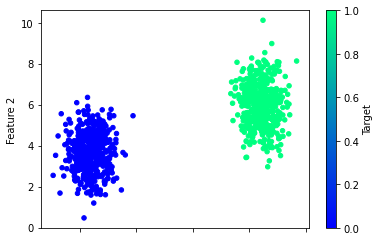

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 836us/step - loss: 1.1257 - accuracy: 0.0013
Epoch 2/100
24/24 [==============================] - 0s 750us/step - loss: 1.0757 - accuracy: 0.0027
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 1.0308 - accuracy: 0.0067
Epoch 4/100
24/24 [==============================] - 0s 648us/step - loss: 0.9900 - accuracy: 0.0133
Epoch 5/100
24/24 [==============================] - 0s 648us/step - loss: 0.9536 - accuracy: 0.0267
Epoch 6/100
24/24 [==============================] - 0s 691us/step - loss: 0.9214 - accuracy: 0.0453
Epoch 7/100
24/24 [==============================] - 0s 703us/step - loss: 0.8930 - accuracy: 0.0667
Epoch 8/100
24/24 [==============================] - 0s 755us/step - loss: 0.8678 - accuracy: 0.0933
Epoch 9/100
24/24 [==============================] - 0s 791us/step - loss: 0.8467 - accuracy: 0.1253
Epoch 10/100
24/24 [==============================] - 0s 766us/step - loss: 0.8281 - accura

24/24 [==============================] - 0s 700us/step - loss: 0.3536 - accuracy: 0.9160
Epoch 82/100
24/24 [==============================] - 0s 827us/step - loss: 0.3460 - accuracy: 0.9200
Epoch 83/100
24/24 [==============================] - 0s 907us/step - loss: 0.3384 - accuracy: 0.9240
Epoch 84/100
24/24 [==============================] - 0s 813us/step - loss: 0.3311 - accuracy: 0.9253
Epoch 85/100
24/24 [==============================] - 0s 778us/step - loss: 0.3239 - accuracy: 0.9253
Epoch 86/100
24/24 [==============================] - 0s 842us/step - loss: 0.3170 - accuracy: 0.9293
Epoch 87/100
24/24 [==============================] - 0s 736us/step - loss: 0.3102 - accuracy: 0.9320
Epoch 88/100
24/24 [==============================] - 0s 718us/step - loss: 0.3035 - accuracy: 0.9320
Epoch 89/100
24/24 [==============================] - 0s 637us/step - loss: 0.2972 - accuracy: 0.9333
Epoch 90/100
24/24 [==============================] - 0s 658us/step - loss: 0.2909 - accuracy: 

<AxesSubplot:>

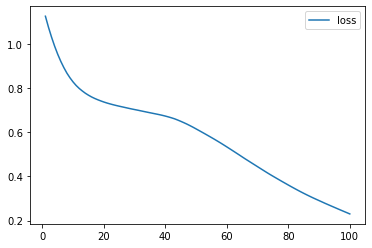

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

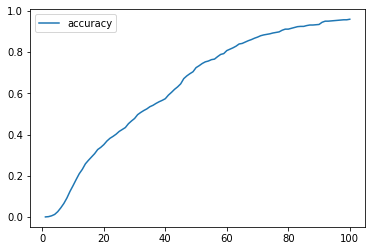

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2119 - accuracy: 0.9720 - 113ms/epoch - 14ms/step
Loss: 0.21185943484306335, Accuracy: 0.972000002861023


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

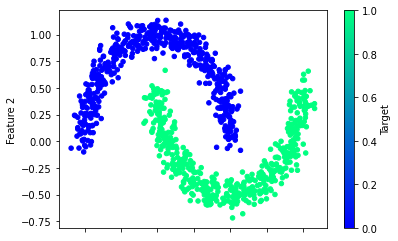

In [19]:
# fromsklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [20]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [21]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5157 - accuracy: 0.2720
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3352 - accuracy: 0.2773
Epoch 3/100
24/24 [==============================] - 0s 984us/step - loss: 1.1980 - accuracy: 0.2920
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1019 - accuracy: 0.3173
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0309 - accuracy: 0.3320
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9770 - accuracy: 0.3440
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9331 - accuracy: 0.3693
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8970 - accuracy: 0.3920
Epoch 9/100
24/24 [==============================] - 0s 950us/step - loss: 0.8669 - accuracy: 0.4133
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.4307
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7813
Epoch 83/100
24/24 [==============================] - 0s 970us/step - loss: 0.4615 - accuracy: 0.7827
Epoch 84/100
24/24 [==============================] - 0s 1000us/step - loss: 0.4588 - accuracy: 0.7840
Epoch 85/100
24/24 [==============================] - 0s 984us/step - loss: 0.4563 - accuracy: 0.7853
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.7853
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7880
Epoch 88/100
24/24 [==============================] - 0s 977us/step - loss: 0.4489 - accuracy: 0.7893
Epoch 89/100
24/24 [==============================] - 0s 935us/step - loss: 0.4465 - accuracy: 0.7920
Epoch 90/100
24/24 [==============================] - 0s 954us/step - loss: 0.4443 - accuracy: 0.7933
Epoch 91/100
24/24 [==============================] - 0s 941us/step - loss: 0.4420 - accuracy: 0.797

<AxesSubplot:>

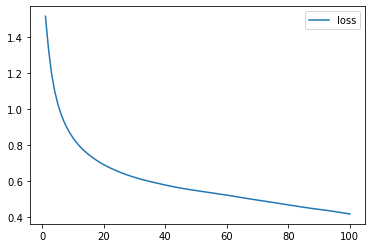

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

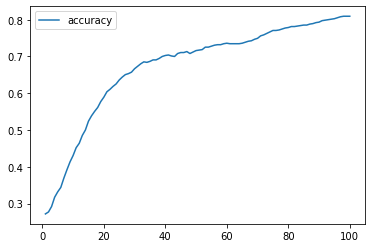

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 884us/step - loss: 0.6854 - accuracy: 0.5267
Epoch 2/100
24/24 [==============================] - 0s 868us/step - loss: 0.6561 - accuracy: 0.6173
Epoch 3/100
24/24 [==============================] - 0s 808us/step - loss: 0.6293 - accuracy: 0.6360
Epoch 4/100
24/24 [==============================] - 0s 751us/step - loss: 0.6047 - accuracy: 0.6667
Epoch 5/100
24/24 [==============================] - 0s 920us/step - loss: 0.5822 - accuracy: 0.6880
Epoch 6/100
24/24 [==============================] - 0s 875us/step - loss: 0.5615 - accuracy: 0.7040
Epoch 7/100
24/24 [==============================] - 0s 689us/step - loss: 0.5428 - accuracy: 0.7293
Epoch 8/100
24/24 [==============================] - 0s 782us/step - loss: 0.5256 - accuracy: 0.7400
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7493
Epoch 10/100
24/24 [==============================] - 0s 827us/step - loss: 0.4953 - accuracy

24/24 [==============================] - 0s 846us/step - loss: 0.1893 - accuracy: 0.9187
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1878 - accuracy: 0.9200
Epoch 83/100
24/24 [==============================] - 0s 829us/step - loss: 0.1866 - accuracy: 0.9200
Epoch 84/100
24/24 [==============================] - 0s 670us/step - loss: 0.1851 - accuracy: 0.9213
Epoch 85/100
24/24 [==============================] - 0s 724us/step - loss: 0.1837 - accuracy: 0.9213
Epoch 86/100
24/24 [==============================] - 0s 711us/step - loss: 0.1822 - accuracy: 0.9213
Epoch 87/100
24/24 [==============================] - 0s 754us/step - loss: 0.1809 - accuracy: 0.9227
Epoch 88/100
24/24 [==============================] - 0s 764us/step - loss: 0.1795 - accuracy: 0.9227
Epoch 89/100
24/24 [==============================] - 0s 731us/step - loss: 0.1780 - accuracy: 0.9227
Epoch 90/100
24/24 [==============================] - 0s 755us/step - loss: 0.1767 - accuracy: 0.